In [1]:
from makiflow.augmentation.object_detection.augment_ops import FlipAugment
from makiflow.augmentation.object_detection.data_provider import Data
from makiflow.metrics.od_utils import parse_dicts
from makiflow.tools import XmlParser

In [2]:
parser = XmlParser()

In [3]:
d = parser.parse_all_in_dict(source_path='/mnt/data/voc2012/VOCdevkit/VOC2012/Annotations', num_files=10)

  0%|          | 0/17125 [00:00<?, ?it/s]


In [4]:
from makiflow.models.ssd.tools.data_preparing import DataPreparator

In [6]:
class_name_to_num = {}
i = 1
for cl in parser.classes:
    class_name_to_num[cl] = i
    i += 1

In [7]:
preparator = DataPreparator(d, class_name_to_num, '/mnt/data/voc2012/VOCdevkit/VOC2012/JPEGImages/')

In [8]:
preparator.load_images()

100%|██████████| 11/11 [00:00<00:00, 142.40it/s]

Loading images, bboxes and labels...
Images, bboxes and labels are loaded.


In [9]:
preparator.resize_images_and_bboxes((300, 300))

11it [00:00, 316.60it/s]


In [10]:
images = preparator.get_images()

Be careful, images are not normalized.


## Contrast and brightness

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

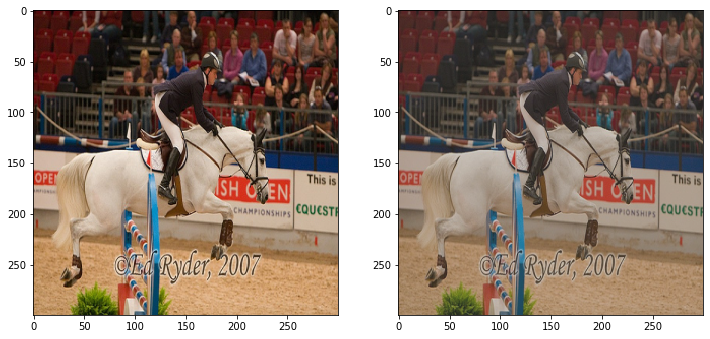

In [43]:
fig = plt.figure()
fig.set_size_inches([12, 12])

fig.add_subplot(1, 2, 1)
plt.imshow(images[0][:, :, ::-1])

fig.add_subplot(1, 2, 2)
plt.imshow(np.clip(images[0][:, :, ::-1]*0.7 + 30, 0, 255).astype(np.uint8))

## Blur

In [44]:
import cv2

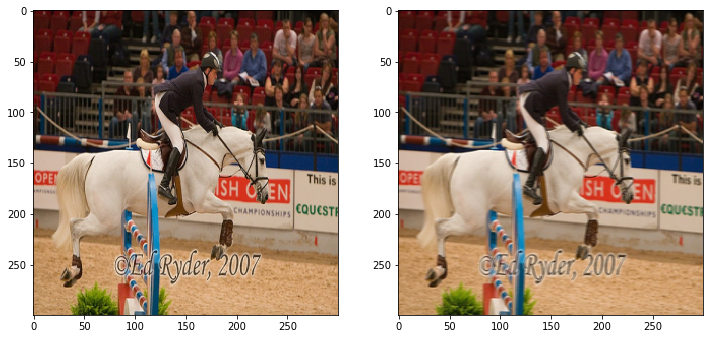

In [58]:
fig = plt.figure()
fig.set_size_inches([12, 12])

fig.add_subplot(1, 2, 1)
plt.imshow(images[0][:, :, ::-1])

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.GaussianBlur(images[0][:, :, ::-1], ksize=(3, 3), sigmaX=3, sigmaY=.1))

## Noise

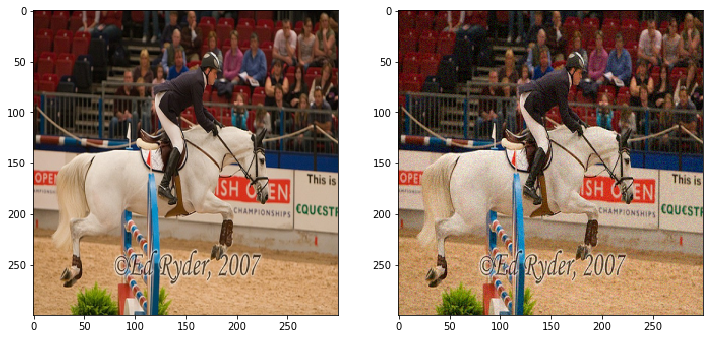

In [66]:
fig = plt.figure()
fig.set_size_inches([12, 12])

fig.add_subplot(1, 2, 1)
plt.imshow(images[0][:, :, ::-1])

fig.add_subplot(1, 2, 2)
plt.imshow(np.clip(images[0][:, :, ::-1] + np.random.randn(*images[0].shape)*8.5, 0, 255).astype(np.uint8))